In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.axes as axes
import matplotlib.markers as mark
from CTRNNclass import *
from pyloricfitness import *

In [2]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = 0
par1_max = 10
par2_min = -15
par2_max = 0
par1_step = .05
par2_step = .05

par1_res = np.arange(par1_min,par1_max,par1_step)
print(len(par1_res))
par2_res = np.arange(par2_min,par2_max,par2_step)
print(len(par2_res))

200
300


In [30]:
fitnessdata = np.loadtxt('../Cpp/realmacc_slice.dat').T
print(len(fitnessdata[0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

200
(array([], dtype=int64), array([], dtype=int64))


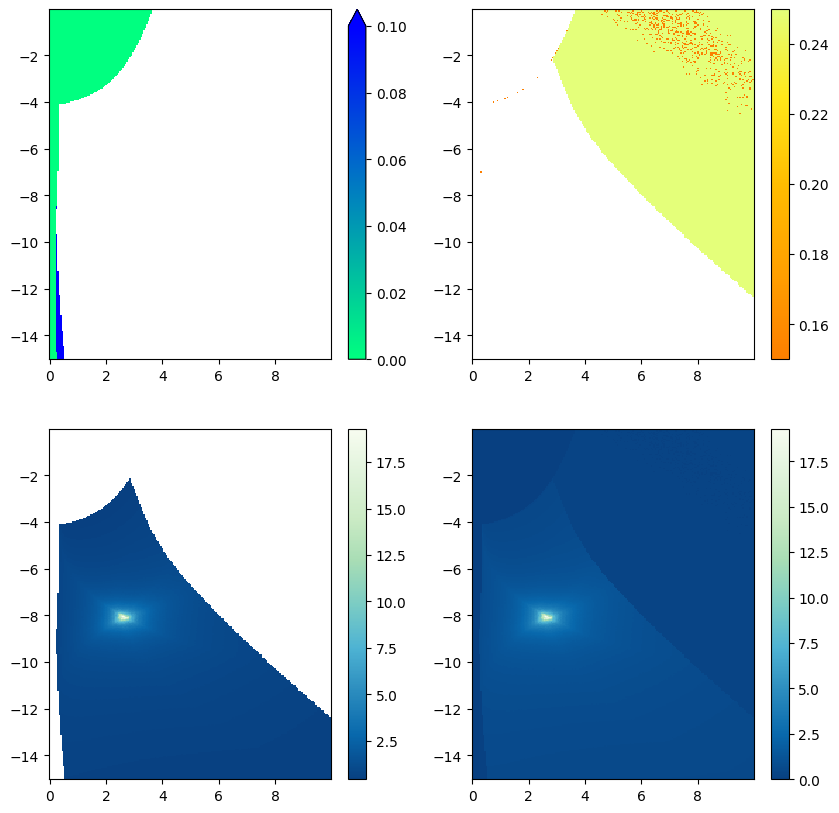

In [4]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
fig.colorbar(pos4,ax=ax4)
plt.show()

300 200


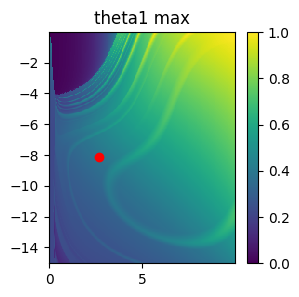

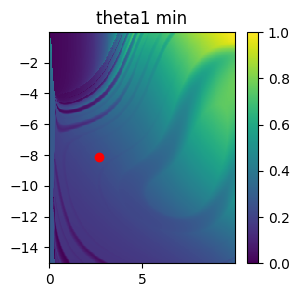

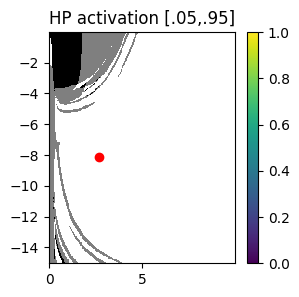

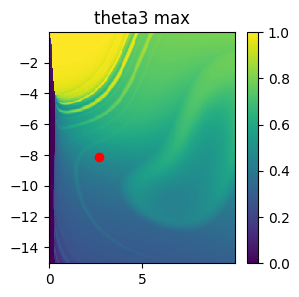

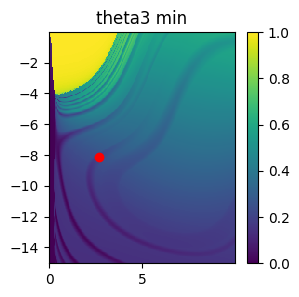

In [70]:
#Realm of Acceptability slice for 20 20,.05 .05 ,.95 .95,1000 1000
plt.rcParams["figure.figsize"]=(3,3)
accdata =np.loadtxt("../Cpp/realmacceptability.dat")
accdata = np.reshape(accdata,(len(par1_res),len(par2_res),2))
accdata = np.swapaxes(accdata,1,0)
maxmindata = np.loadtxt('../Cpp/maxmindetected.dat')
maxmindata = np.reshape(maxmindata,(len(par1_res),len(par2_res),2,3))
maxmindata = np.swapaxes(maxmindata,1,0)
print(len(accdata[:,:,0]),len(accdata[:,:,0][0]))
# plt.title(par1)
# plt.pcolormesh(par1_res,par2_res,accdata[:,:,0],cmap='binary')
# plt.colorbar()
# plt.show()
plt.title(par1 + " max")
theta1_max = maxmindata[:,:,0,0]
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,0,0])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
plt.title(par1 + " min")
theta1_min = maxmindata[:,:,1,0]
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,1,0])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
# plt.title(par2)
# plt.pcolormesh(par1_res,par2_res,accdata[:,:,1],cmap='binary')
# plt.colorbar()
# plt.show()
plt.pcolormesh(par1_res,par2_res,np.sum(accdata,axis=2),cmap='binary')
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.title("HP activation [.05,.95]")
plt.show()
plt.title(par2 + " max")
theta2_max = maxmindata[:,:,0,2]
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,0,2])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
plt.title(par2 + " min")
theta2_min = maxmindata[:,:,1,2]
plt.pcolormesh(par1_res,par2_res,maxmindata[:,:,1,2])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()


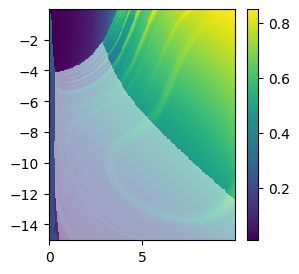

In [71]:
#Use the pyloricness mask to emphasize the pyloric region of each plot
plt.pcolormesh(par1_res,par2_res,np.ma.masked_where(fitnessdata<.3,theta1_max),alpha=.5)
plt.pcolormesh(par1_res,par2_res,np.ma.masked_where(fitnessdata>=.3,theta1_max),alpha=1)
plt.colorbar()
plt.show()

In [72]:
#should plot the bifurcation line, as well, but that's for another day

In [73]:
#more importantly, I should work on adding lines that demarcate where individual ordering criteria must fail

In [118]:
#discretize the values of (max,min)theta1, and (max,min)theta2
disc = .005

theta1_max_range = np.arange(np.min(theta1_max),np.max(theta1_max)+disc,disc)
theta1_min_range = np.arange(np.min(theta1_min),np.max(theta1_min)+disc,disc)
theta2_max_range = np.arange(np.min(theta2_max),np.max(theta2_max)+disc,disc)
theta2_min_range = np.arange(np.min(theta2_min),np.max(theta2_min)+disc,disc)


theta1_max_bins = np.digitize(theta1_max,theta1_max_range)
theta1_min_bins = np.digitize(theta1_min,theta1_min_range)
theta2_max_bins = np.digitize(theta2_max,theta2_max_range)
theta2_min_bins = np.digitize(theta2_min,theta2_min_range)
print(len(theta2_min_range))


201


In [128]:
cont_fitness = np.clip(fitnessdata-.3,0,None) #get a fitness measure that is squarely zero if not pyloric and smoothly increases if it is
relevant_bins = np.zeros((36000,4)) # just need number greater than number of relevant bins
counts =np.zeros(36000)
avg_fitnesses = np.zeros(36000)
max_fitnesses = np.zeros(36000)
min_fitnesses = np.zeros(36000)
k = 0
for i in range(len(theta1_max)):
    for j in range(len(theta1_max[0])):
        loc = np.where((relevant_bins == (theta1_max_bins[i,j],theta1_min_bins[i,j],theta2_max_bins[i,j],theta2_min_bins[i,j])).all(axis=1))[0]
        if len(loc)==1:
            counts[loc[0]] += 1
            fit = cont_fitness[i,j]
            avg_fitnesses[k] += fit
            if fit > max_fitnesses[loc[0]]:
                max_fitnesses[loc[0]] = fit
            elif fit < min_fitnesses[loc[0]]:
                min_fitnesses[loc[0]] = fit
        else: 
            relevant_bins[k] = [theta1_max_bins[i,j],theta1_min_bins[i,j],theta2_max_bins[i,j],theta2_min_bins[i,j]]
            counts[k] += 1
            fit = cont_fitness[i,j]
            avg_fitnesses[k] += fit
            max_fitnesses[k] = fit
            min_fitnesses[k] = fit
            k += 1
        

In [139]:
num_relevant_bins = len(np.where(counts!=0)[0])
print(num_relevant_bins)
print(max(counts))
print(counts[np.where(counts > 1)])
print(min(counts[0:num_relevant_bins]))


35638
370.0
[222.   2.   3. ...   3.   2.   2.]
1.0


(array([3.5609e+04, 2.0000e+01, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  37.9,  74.8, 111.7, 148.6, 185.5, 222.4, 259.3, 296.2,
        333.1, 370. ]),
 <BarContainer object of 10 artists>)

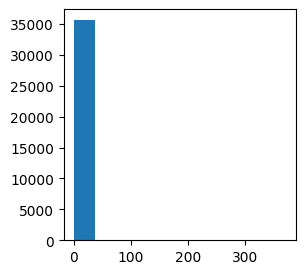

In [137]:
plt.hist(counts[0:num_relevant_bins])


You mean to tell me every single point is in a unique bin...?

In [172]:
#all the bins which do not allow non-pyloricness
fitness_thresh = 16
idxs = np.where(min_fitnesses>fitness_thresh)[0]
count_idxs = counts[np.where(min_fitnesses>fitness_thresh)[0]]
bin_idx = relevant_bins[np.where(min_fitnesses>fitness_thresh)[0]]

bestbin = bin_idx[np.where(count_idxs>1)[0]].astype(int)[0]
print(bestbin)
print(theta1_max_range[bestbin[0]],theta1_min_range[bestbin[1]],theta2_max_range[bestbin[2]],theta2_min_range[bestbin[3]])

[65 34 97 42]
0.33385787000000006 0.17138447999999998 0.485000336593 0.21000033658099998


In [173]:
max_fitnesses[idxs[0]]

18.9645

Slight problem with methodology: anything with a detected maxmin range that includes the entireity of another maxmin range would be included in the larger one's HP acceptability. Re-do analysis with comibining things in this way (smaller ranges are still unique, but larger ranges will add in the smaller ones they contain)

Analyze what happened with an HP mechanism derived from above analysis (the only maxmin bin that accepts multiple points, but all of them are pyloric), started from many random initial points 

In [264]:
initial_final = np.loadtxt("../Cpp/ICs.dat")
initial_final = initial_final.reshape((1000,2,2))
print(initial_final[0])
initials = initial_final[:,0]
finals = initial_final[:,1]

[[ -2.68802 -13.0571 ]
 [  3.14341  -8.62924]]


In [265]:
#fitnesses
fitnesses = np.loadtxt('../Cpp/FinalFitnesses.dat')
len(fitnesses)
norm_fitnesses = (fitnesses+.1)/max(fitnesses+.1)

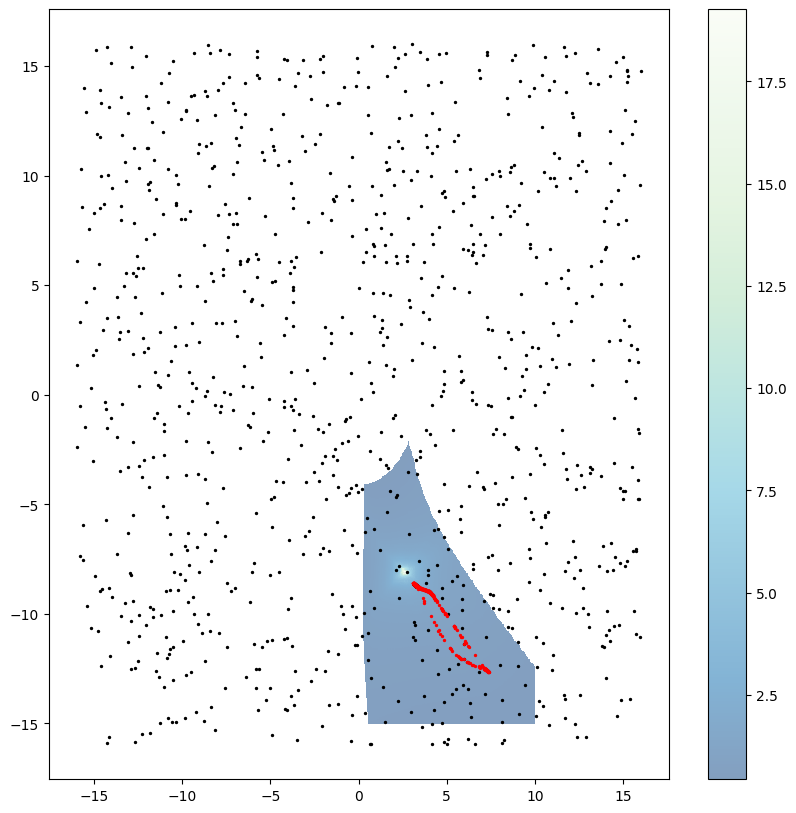

In [272]:
# plt.pcolormesh(par1_res,par2_res,np.ma.masked_where(fitnessdata<.3,theta1_max),alpha=.5)
# plt.pcolormesh(par1_res,par2_res,np.ma.masked_where(fitnessdata>=.3,theta1_max),alpha=1)
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#,alpha=norm_fitnesses
plt.show()

Repeat Analysis with Ronn

In [256]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = -5
par1_max = 5
par2_min = -15
par2_max = -5
par1_step = .05
par2_step = .05

par1_res = np.arange(par1_min,par1_max+.001,par1_step)
print(len(par1_res))
par2_res = np.arange(par2_min,par2_max,par2_step)
print(len(par2_res))

201
200


In [257]:
fitnessdata = np.loadtxt('../Cpp/Ronn_slice.dat').T
print(len(fitnessdata),len(fitnessdata[0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

200 201
(array([], dtype=int64), array([], dtype=int64))


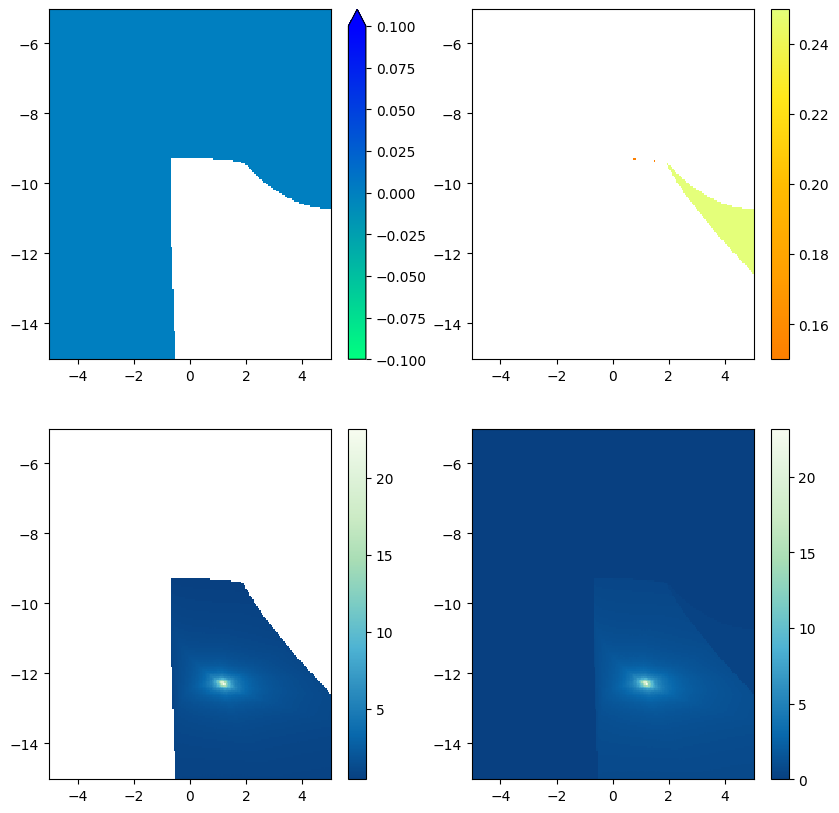

In [258]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
fig.colorbar(pos4,ax=ax4)
plt.show()

In [259]:
initial_final = np.loadtxt("../Cpp/RonnICs.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]

In [261]:
#fitnesses
fitnesses = np.loadtxt('../Cpp/RonnFinalFitnesses.dat')
len(fitnesses)
norm_fitnesses = (fitnesses+.1)/max(fitnesses+.1) #ensure that zero fitness points still show up

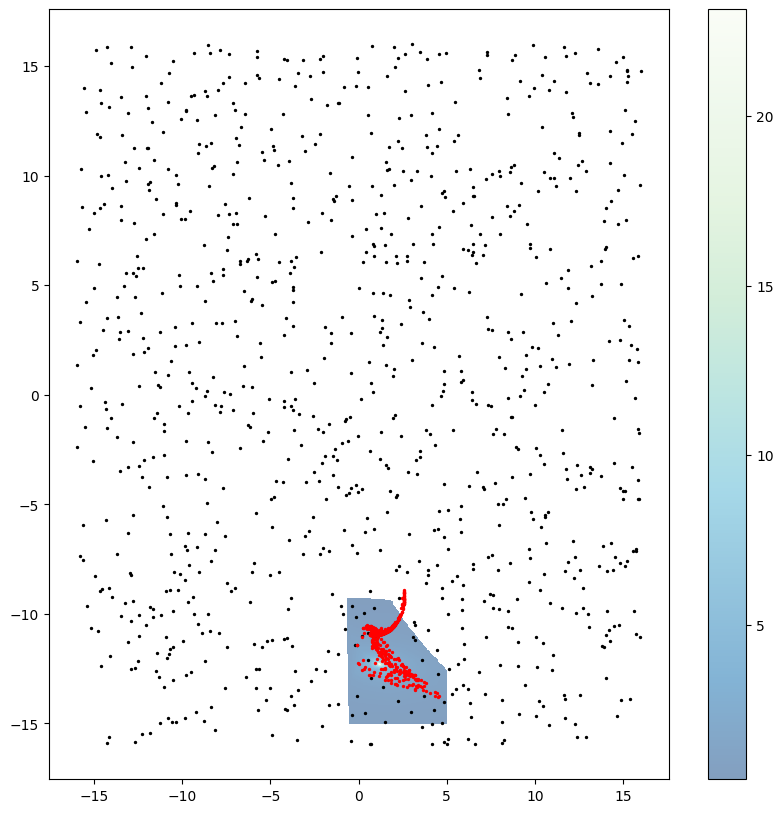

In [263]:
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#,alpha=norm_fitnesses
plt.show()

Repeat Analysis with Quinn

In [243]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = -5
par1_max = 5
par2_min = -15
par2_max = 0
par1_step = .05
par2_step = .05

par1_res = np.arange(par1_min,par1_max+.001,par1_step)
print(len(par1_res))
par2_res = np.arange(par2_min,par2_max,par2_step)
print(len(par2_res))

201
300


In [244]:
fitnessdata = np.loadtxt('../Cpp/Quinn_slice.dat').T
print(len(fitnessdata),len(fitnessdata[0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

300 201
(array([], dtype=int64), array([], dtype=int64))


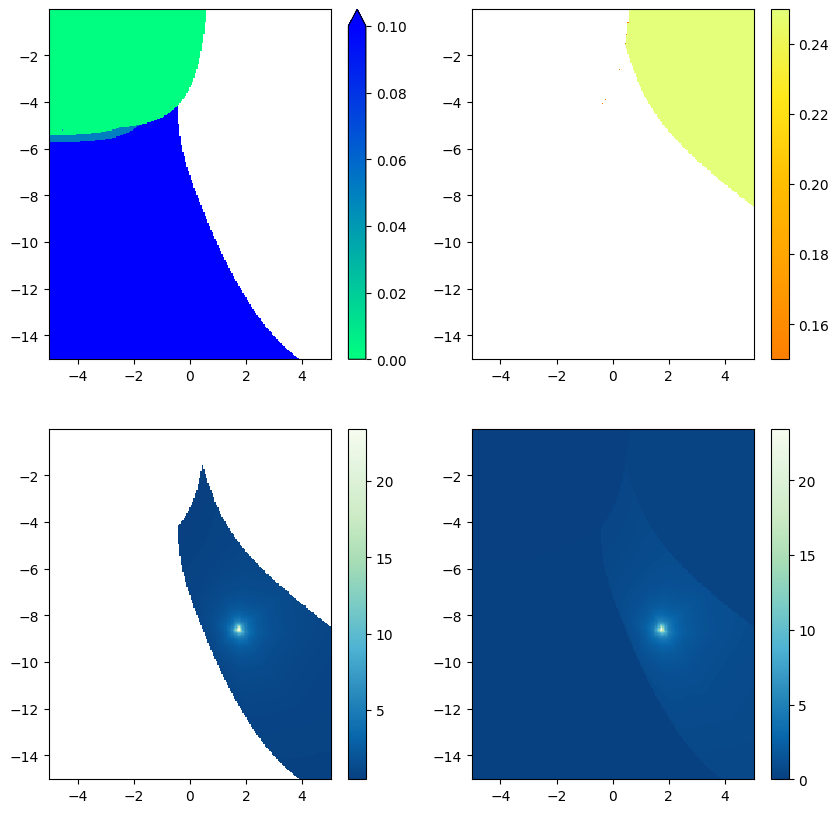

In [245]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
fig.colorbar(pos4,ax=ax4)
plt.show()

In [246]:
initial_final = np.loadtxt("../Cpp/QuinnICs.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]

In [247]:
#fitnesses
fitnesses = np.loadtxt('../Cpp/QuinnFinalFitnesses.dat')
len(fitnesses)
norm_fitnesses = (fitnesses+.1)/max(fitnesses+.1) #ensure that zero fitness points still show up 

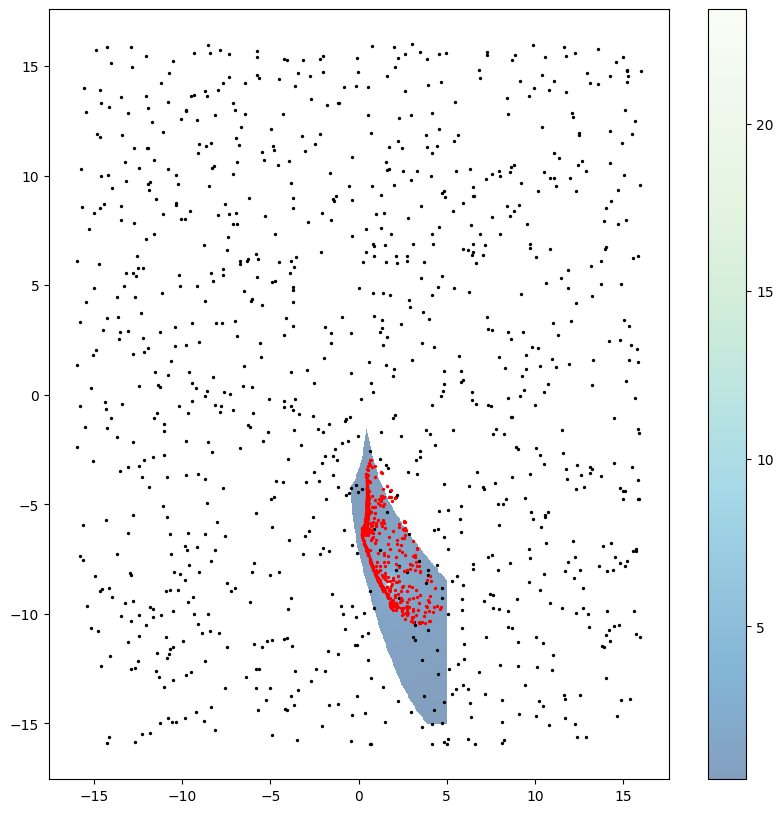

In [248]:
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#alpha=norm_fitnesses)
plt.show()

Repeat analysis with Sven

In [3]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = 0
par1_max = 10
par2_min = -10
par2_max = 5
par1_step = .05
par2_step = .05

par1_res = np.arange(par1_min,par1_max,par1_step)
print(len(par1_res))
par2_res = np.arange(par2_min,par2_max+.001,par2_step)
print(len(par2_res))

200
301


In [4]:
fitnessdata = np.loadtxt('../Cpp/Sven_slice.dat').T
print(len(fitnessdata),len(fitnessdata[0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

301 200
(array([], dtype=int64), array([], dtype=int64))


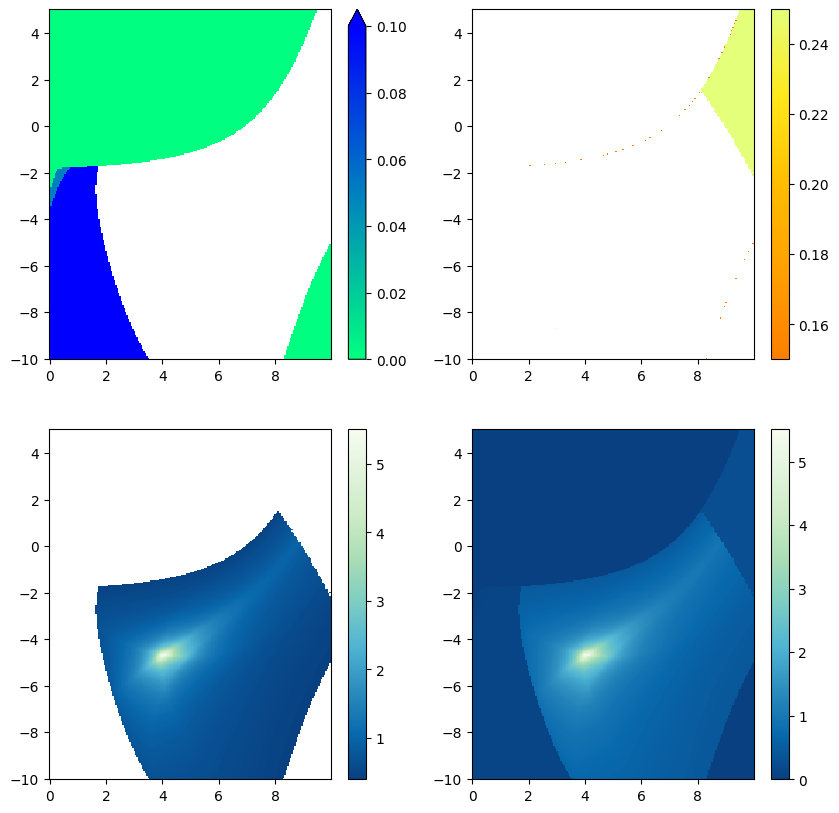

In [5]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
fig.colorbar(pos4,ax=ax4)
plt.show()

In [6]:
initial_final = np.loadtxt("../Cpp/SvenICs.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]

In [7]:
#fitnesses
fitnesses = np.loadtxt('../Cpp/SvenFinalFitnesses.dat')
len(fitnesses)
norm_fitnesses = (fitnesses+.1)/max(fitnesses+.1) #ensure that zero fitness points still show up 

In [11]:
biastrack = np.loadtxt('../Cpp/SvenBiasTrack.dat')
dt = .025
runduration = 5000
runsteps = int(runduration/dt)+1
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

NameError: name 'repeats' is not defined

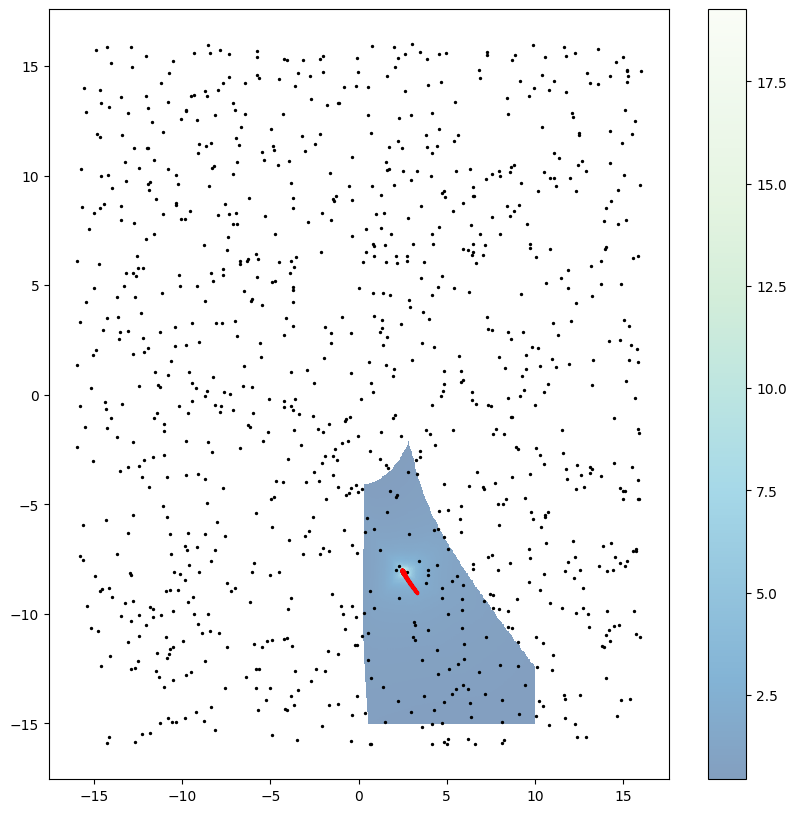

In [6]:
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#alpha=norm_fitnesses)
for i in range(repeats):
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()

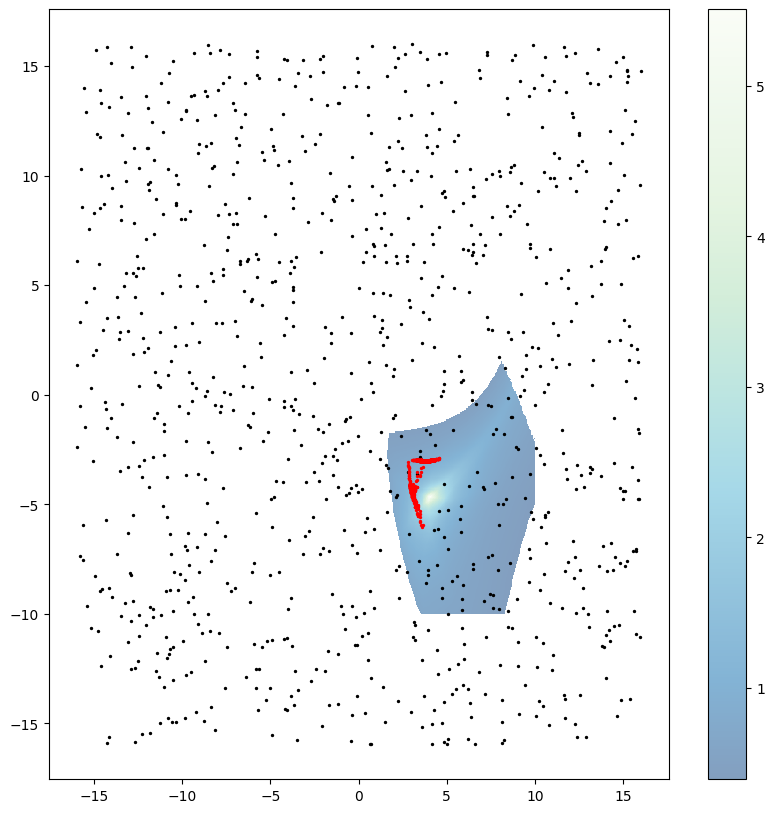

In [14]:
#version where plasticity duration is doubled
initial_final = np.loadtxt("../Cpp/SvenICslong.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#alpha=norm_fitnesses)
plt.show()

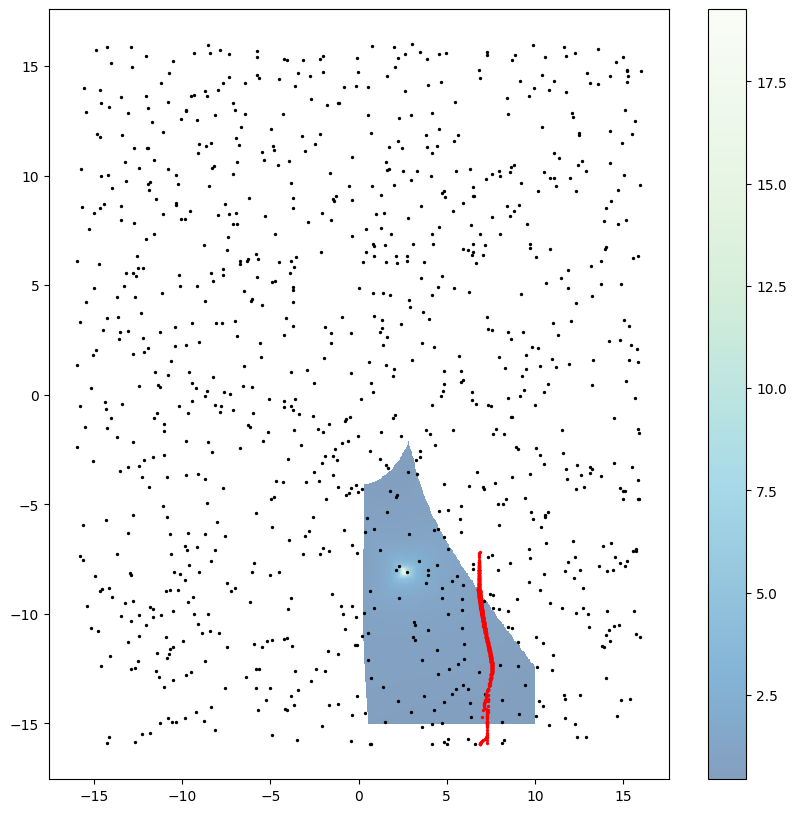

In [8]:
#version with new HP
initial_final = np.loadtxt("../Cpp/SvenICsnew.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#alpha=norm_fitnesses)
plt.show()

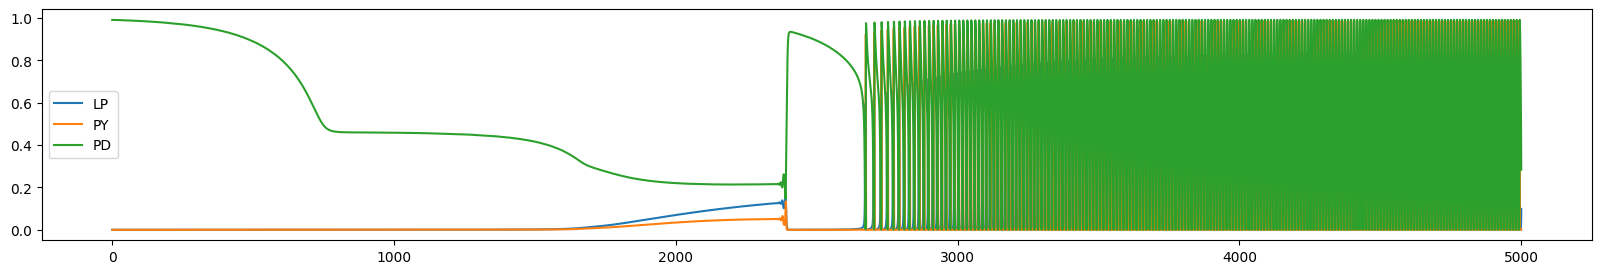

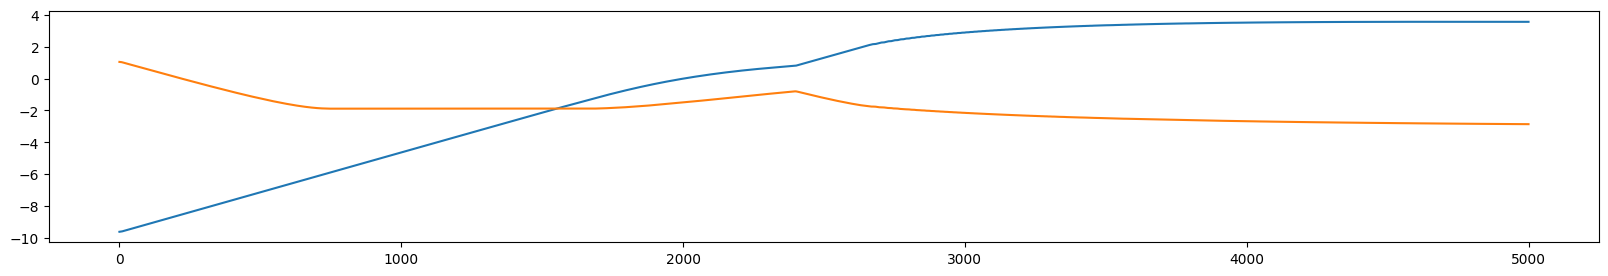

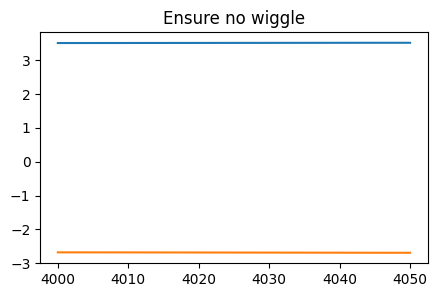

this is because of the sliding window


In [36]:
#briefly, create exemplar plots of adapting points
individx = 2
time = np.arange(0,runduration+dt,dt)
states = np.loadtxt("../Cpp/SvenStatesTrack.dat")
reps = int(1000/200)
states = states.reshape(reps,runsteps,3)
labels = ['LP','PY','PD']
LB1 = np.ones(len(time)) * 0.17138447999999998 
LB3 = np.ones(len(time)) *0.33385787000000006
UB1 = np.ones(len(time)) *0.21000033658099998
UB3 = np.ones(len(time)) * 0.485000336593
plt.figure(figsize = (20,3))
for i in range(3):
    plt.plot(time,states[individx,:,i],label=labels[i])
# plt.plot(time,LB1,'b')
# plt.plot(time,UB1,'b')
# plt.plot(time,LB3,'g')
# plt.plot(time,UB3,'g')
plt.legend()
plt.show()
plt.figure(figsize = (20,3))
for i in range(2):
    plt.plot(time, biastrack[((individx+1)*10)-1,:,i])
plt.show()
plt.figure(figsize = (5,3))
plt.title('Ensure no wiggle')
timezoom = [int(4000/dt),int(4050/dt)]
for i in range(2):
    plt.plot(time[timezoom[0]:timezoom[1]], biastrack[((individx+1)*10)-1,timezoom[0]:timezoom[1],i])
plt.show()
print("this is because of the sliding window")

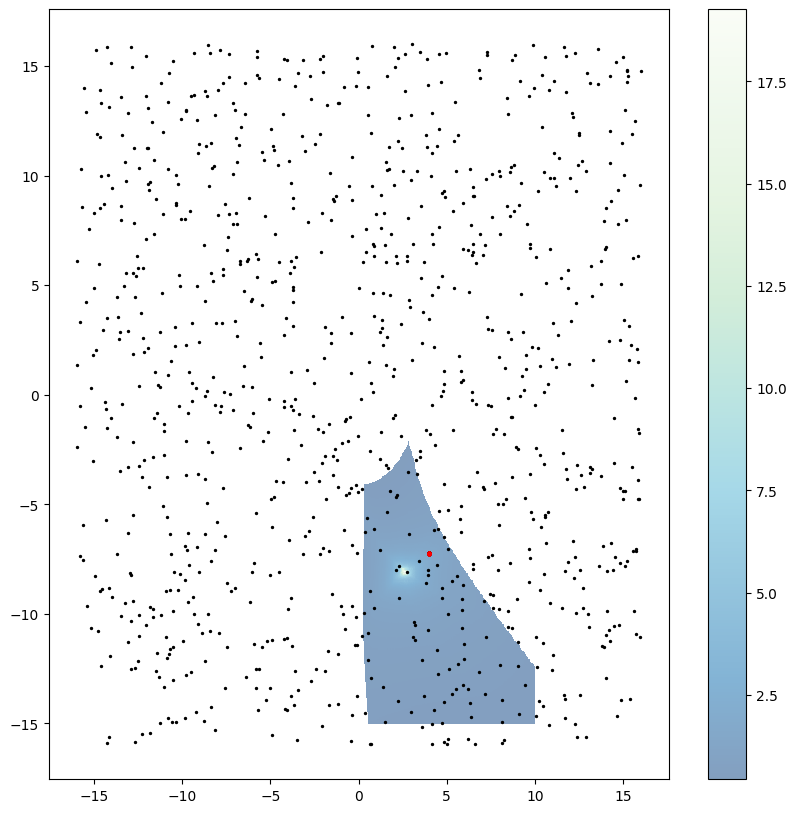

In [5]:
#version where plasticity duration is doubled
initial_final = np.loadtxt("../Cpp/PeteICsTEST.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#alpha=norm_fitnesses)
plt.show()

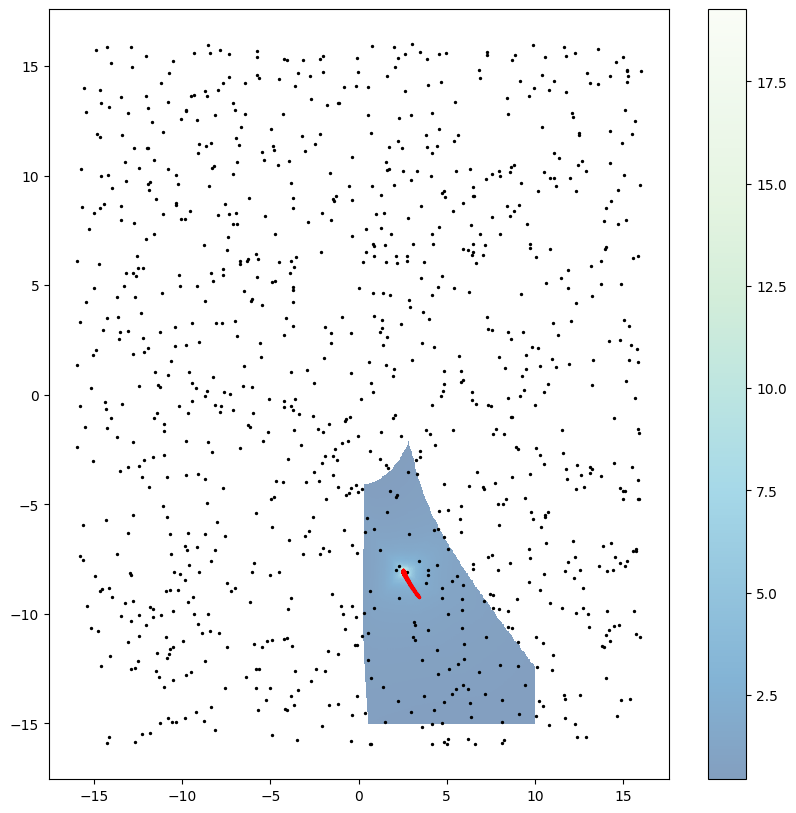

In [14]:
#version where plasticity duration is doubled
initial_final = np.loadtxt("../Cpp/PeteICsfast.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#alpha=norm_fitnesses)
plt.show()

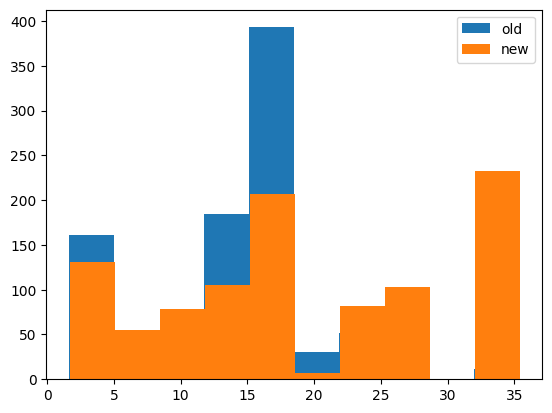

In [20]:
oldfitness = np.loadtxt("../Cpp/FinalFitnessessfast.dat")
newfitness = np.loadtxt("../Cpp/FinalFitnessesfastnewfitness.dat")
plt.hist(oldfitness,label='old')
plt.hist(newfitness,label='new')
plt.legend()
plt.show()

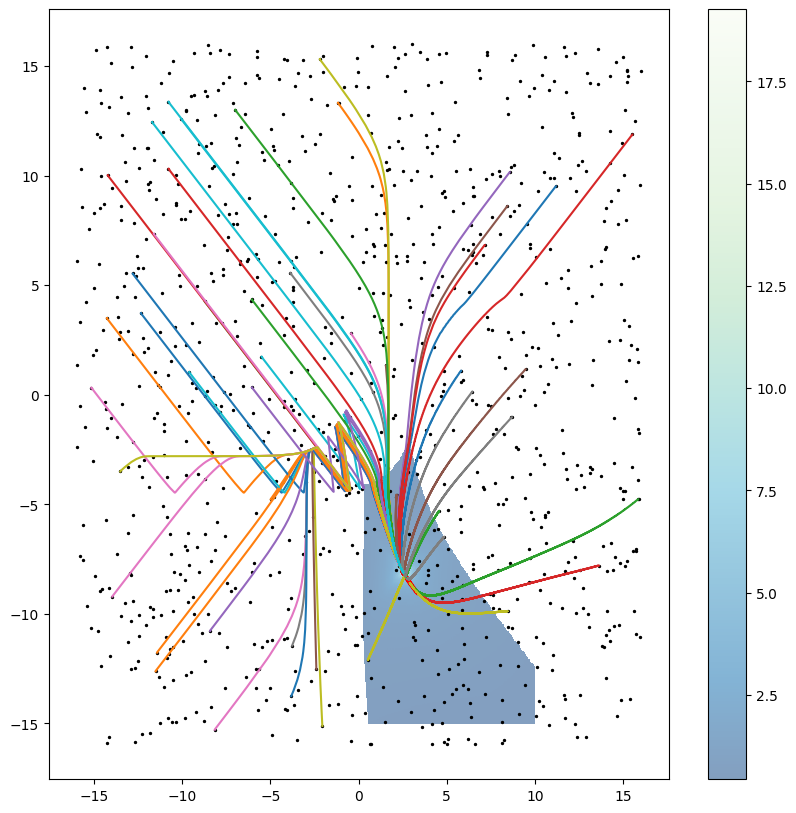

In [24]:
#HP number 18 with old encoding (LB/UB)
biastrack = np.loadtxt('../Cpp/PeteBiasTrack18.dat')
dt = .01
runduration = 4000
runsteps = int(runduration/dt)+1
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

initial_final = np.loadtxt("../Cpp/PeteICs18.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0],finals[:,1],color='r',s=2)#alpha=norm_fitnesses)
for i in range(repeats):
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()

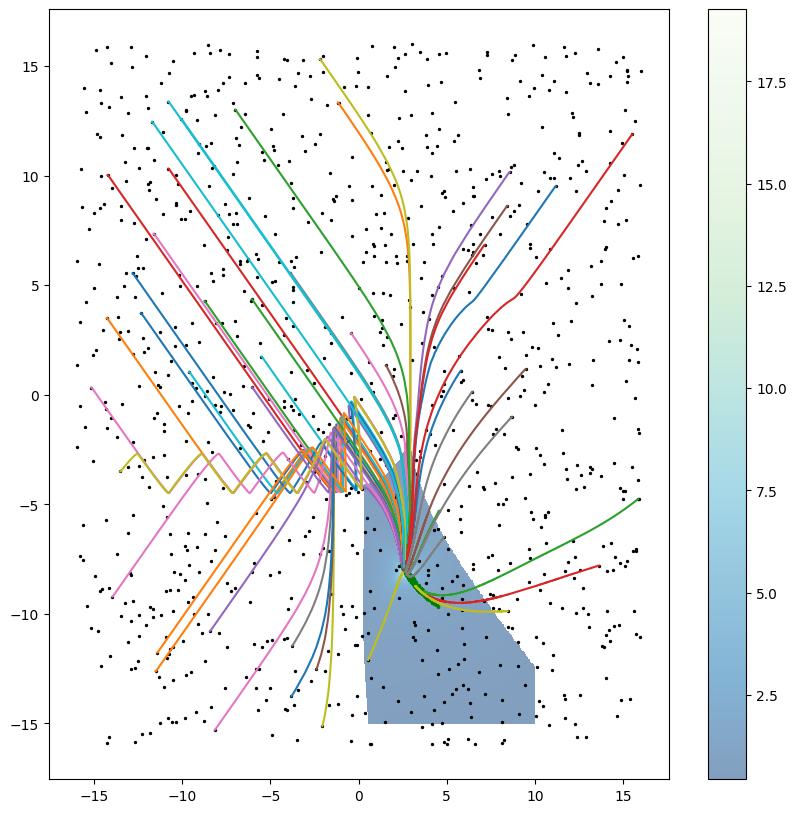

In [37]:
#HP number 18 with old encoding (LB/UB)
biastrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/BiasTrack33.dat')
dt = .01
runduration = 10000
biastrack = biastrack.reshape(repeats, runsteps, 2)

fitnesses = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/FinalFitness33.dat')

initial_final = np.loadtxt("../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/ICs33.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0][np.where(fitnesses>.3)],finals[:,1][np.where(fitnesses>.3)],color='g',s=2)
plt.scatter(finals[:,0][np.where(fitnesses<=.3)],finals[:,1][np.where(fitnesses<=.3)],color='r',s=2)
for i in range(repeats):
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()

300 200
(array([], dtype=int64), array([], dtype=int64))


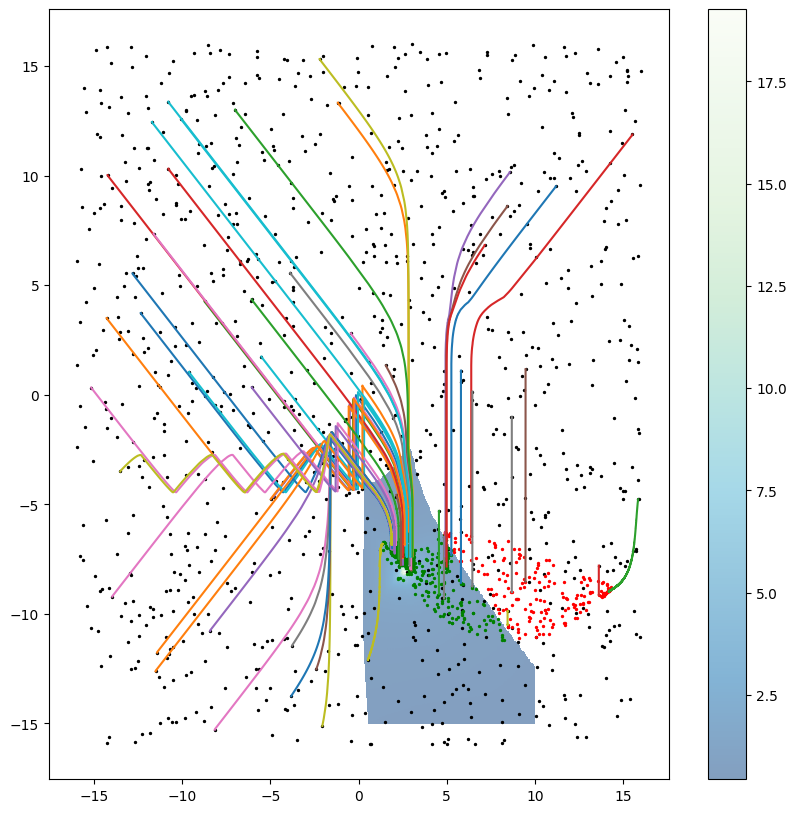

In [33]:
#HP number 37 on Pete
fitnessdata = np.loadtxt('../Cpp/realmacc_slice.dat').T
print(len(fitnessdata),len(fitnessdata[0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)

biastrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/BiasTrack37.dat')
dt = .01
repeats = int(1000/20)
runduration =  5000
runsteps = int(runduration/dt)
biastrack = biastrack.reshape(repeats, runsteps, 2)

fitnesses = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/FinalFitness37.dat')

initial_final = np.loadtxt("../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/ICs37.dat")
initial_final = initial_final.reshape((1000,2,2))
initials = initial_final[:,0]
finals = initial_final[:,1]
plt.figure(figsize=(10,10))
plt.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r',alpha=.5)
plt.colorbar()
plt.scatter(initials[:,0],initials[:,1],color='k',s=2)
plt.scatter(finals[:,0][np.where(fitnesses>.3)],finals[:,1][np.where(fitnesses>.3)],color='g',s=2)
plt.scatter(finals[:,0][np.where(fitnesses<=.3)],finals[:,1][np.where(fitnesses<=.3)],color='r',s=2)
for i in range(repeats):
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()

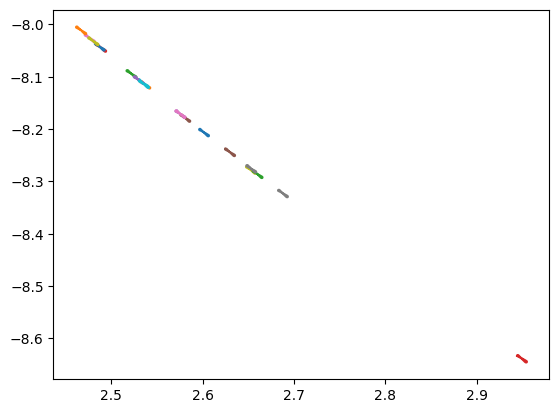

In [31]:
#zoom in on final bias activity
end_dur = 250
for i in range(20):
    plt.plot(biastrack[i,-end_dur:,0],biastrack[i,-end_dur:,1])
plt.show()

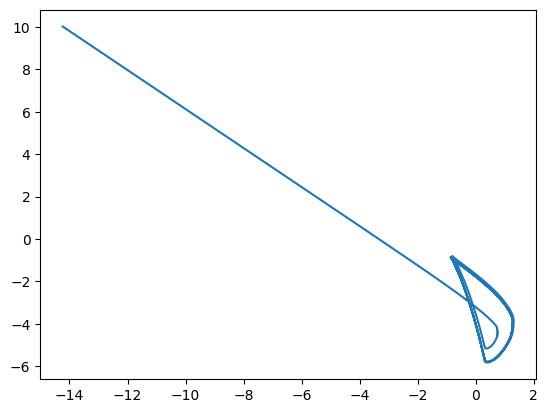

In [18]:
i=3
plt.plot(biastrack[i,:,0],biastrack[i,:,1])